### Classifying Normal and Anomalous HTTP Requests Using Machine Learning

In [11]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [12]:
import pandas as pd

file_path = 'combined_parsed_requests.csv'
df = pd.read_csv(file_path)

df.head()


,GET,POST,PUT,DELETE,PATCH,Full URL,URL Path,Query Params,Query Params Length,Number of Query Params,...,Accept-Encoding,Accept-Charset,Accept-Language,Pragma,Connection,Body Length,URL Length,Special Characters Count in URL,Special Characters Count in Query Params,request_type
0,1,0,0,0,0,http://localhost:8080/tienda1/publico/autentic...,/tienda1/publico/autenticar.jsp,modo=entrar; login=kavaler; pwd=timb44; rememb...,59,5,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,112,3,9,1
1,1,0,0,0,0,http://localhost:8080/tienda1/publico/autentic...,/tienda1/publico/autenticar.jsp,modo=entrar; login=bette-an; pwd=jARAn6rO; rem...,62,5,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,115,3,9,1
2,1,0,0,0,0,http://localhost:8080/tienda1/publico/vaciar.j...,/tienda1/publico/vaciar.jsp,B2=Vaciar carrito,17,1,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,66,3,1,1
3,0,1,0,0,0,http://localhost:8080/tienda1/publico/anadir.jsp,/tienda1/publico/anadir.jsp,NaN,0,0,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,48,3,0,1
4,1,0,0,0,0,http://localhost:8080/tienda1/publico/caracter...,/tienda1/publico/caracteristicas.jsp,"id=1','0','0','0');waitfor delay '0:0:15';--",78,1,...,"x-gzip, x-deflate, gzip, deflate","utf-8, utf-8;q=0.5, *;q=0.5",en,no-cache,close,0,136,3,19,0


In [13]:
import pandas as pd
from pycaret.clustering import setup, create_model, evaluate_model, assign_model, save_model, plot_model

In [14]:
from pycaret.classification import *

In [15]:
sample_data = df.sample(frac=0.3, random_state=42)

In [16]:

exp = setup(data=sample_data, target='request_type', session_id=42, normalize=True)

,Description,Value
0,Session id,42
1,Target,request_type
2,Target type,Binary
3,Original data shape,"(18320, 26)"
4,Transformed data shape,"(18320, 25)"
5,Transformed train set shape,"(12824, 25)"
6,Transformed test set shape,"(5496, 25)"
7,Numeric features,13
8,Categorical features,12
9,Rows with missing values,100.0%


In [17]:
best_model = compare_models()


In [18]:
knn_model = create_model('knn')

evaluate_model(knn_model)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8496,0.8683,0.9563,0.8186,0.8821,0.6778,0.6935
1,0.8628,0.8782,0.9484,0.8396,0.8907,0.7084,0.7179
2,0.8402,0.8553,0.9537,0.8092,0.8755,0.6566,0.6741
3,0.8472,0.8635,0.9352,0.8279,0.8783,0.6753,0.6843
4,0.8557,0.8672,0.9377,0.8369,0.8844,0.6940,0.7020
5,0.8573,0.8744,0.9298,0.8438,0.8847,0.6985,0.7042
6,0.8432,0.8615,0.9417,0.8191,0.8762,0.6654,0.6774
7,0.8448,0.8617,0.9338,0.8255,0.8763,0.6700,0.6793
8,0.8619,0.8795,0.9404,0.8432,0.8892,0.7076,0.7150


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [19]:
predictions = predict_model(knn_model)

print(predictions.head())


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,K Neighbors Classifier,0.8473,0.8617,0.9391,0.8256,0.8787,0.6750,0.6853


       GET  POST  PUT  DELETE  PATCH  \
35410    1     0    0       0      0   
20007    1     0    0       0      0   
6059     1     0    0       0      0   
56249    1     0    0       0      0   
32713    1     0    0       0      0   

                                                Full URL  \
35410  http://localhost:8080/tienda1/global/creditos.jsp   
20007  http://localhost:8080/tienda1/publico/carrito.jsp   
6059   http://localhost:8080/tienda1/publico/autentic...   
56249    http://localhost:8080/tienda1/imagenes/logo.gif   
32713  http://localhost:8080/tienda1/miembros/imagene...   

                                    URL Path  \
35410           /tienda1/global/creditos.jsp   
20007           /tienda1/publico/carrito.jsp   
6059         /tienda1/publico/autenticar.jsp   
56249             /tienda1/imagenes/logo.gif   
32713  /tienda1/miembros/imagenes/castro.jpg   

                                            Query Params  Query Params Length  \
35410                       

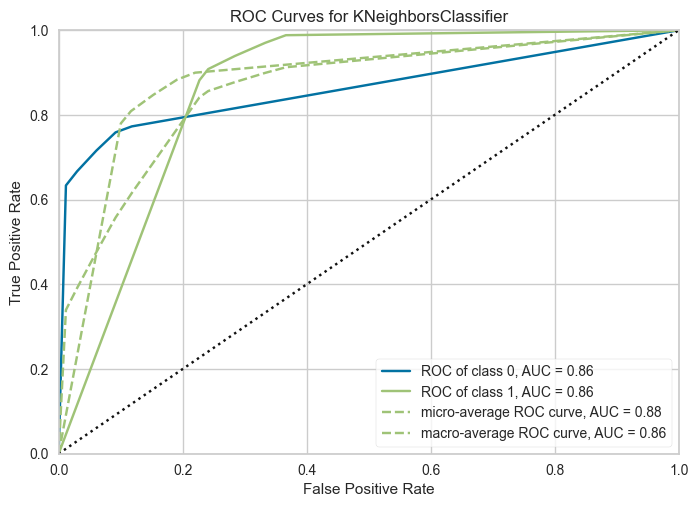

In [20]:
plot_model(knn_model, plot='auc')

#### Random Forest Classifier

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

# Load the dataset
data = pd.read_csv('combined_parsed_requests.csv')

# Fill any missing values (optional: customize this based on your data)
data.fillna('', inplace=True)

# Separate features (X) and target (y)
X = data.drop(columns=['request_type'])  # Features
y = data['request_type']  # Target

# Identify categorical columns
categorical_columns = X.select_dtypes(include=['object']).columns

# One-Hot Encode categorical columns
X = pd.get_dummies(X, columns=categorical_columns)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8956030459346598
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5011
           1       0.93      0.90      0.91      7202

    accuracy                           0.90     12213
   macro avg       0.89      0.90      0.89     12213
weighted avg       0.90      0.90      0.90     12213



##### Iterative Random Forest

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder

# Load the combined dataset
data = pd.read_csv('combined_parsed_requests.csv')

# Define features and target
feature_columns = data.columns.drop('request_type')
X = data[feature_columns]
y = data['request_type']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Initial split of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Number of iterations to refine the model
n_iterations = 5

for iteration in range(n_iterations):
    # Train the model
    model.fit(X_train, y_train)

    # Make predictions
    y_pred = model.predict(X_test)

    # Evaluate the model
    print(f"Iteration {iteration + 1}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}\n")

    # Identify misclassified samples
    misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test.iloc[i]]

    # If there are no misclassified samples, break the loop
    if not misclassified_indices:
        print("No misclassified samples left. Stopping training.")
        break

    # Get the misclassified samples
    misclassified_X = X_test.iloc[misclassified_indices]
    misclassified_y = y_test.iloc[misclassified_indices]

    # Append misclassified samples to the training set
    X_train = pd.concat([X_train, misclassified_X])
    y_train = pd.concat([y_train, misclassified_y])

print("Training complete.")

Iteration 1:
[[6778  752]
 [1104 9686]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      7530
           1       0.93      0.90      0.91     10790

    accuracy                           0.90     18320
   macro avg       0.89      0.90      0.90     18320
weighted avg       0.90      0.90      0.90     18320

Accuracy: 0.8987

Iteration 2:
[[ 6556   974]
 [  626 10164]]
              precision    recall  f1-score   support

           0       0.91      0.87      0.89      7530
           1       0.91      0.94      0.93     10790

    accuracy                           0.91     18320
   macro avg       0.91      0.91      0.91     18320
weighted avg       0.91      0.91      0.91     18320

Accuracy: 0.9127

Iteration 3:
[[ 6957   573]
 [  575 10215]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      7530
           1       0.95      0.95      0.95     10790

    accuracy      

Iteration 1:
[[655 111]
 [ 81 985]]
              precision    recall  f1-score   support

           0       0.89      0.86      0.87       766
           1       0.90      0.92      0.91      1066

    accuracy                           0.90      1832
   macro avg       0.89      0.89      0.89      1832
weighted avg       0.90      0.90      0.89      1832

Accuracy: 0.8952



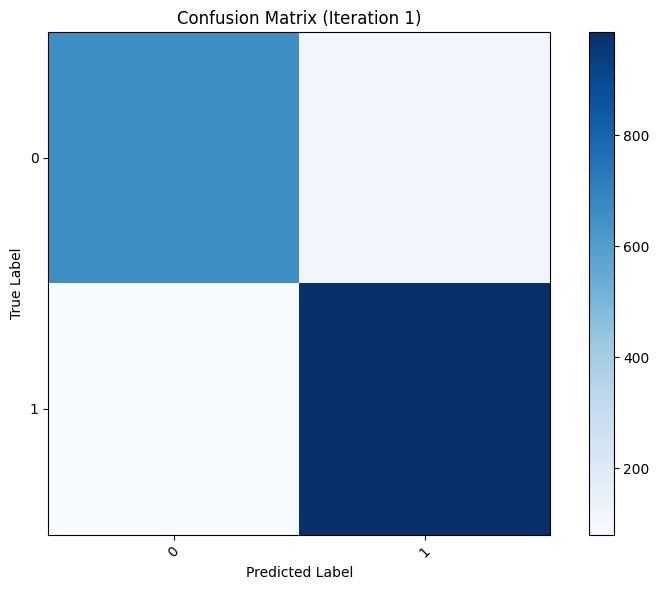

Iteration 2:
[[ 705   61]
 [  57 1009]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       766
           1       0.94      0.95      0.94      1066

    accuracy                           0.94      1832
   macro avg       0.93      0.93      0.93      1832
weighted avg       0.94      0.94      0.94      1832

Accuracy: 0.9356



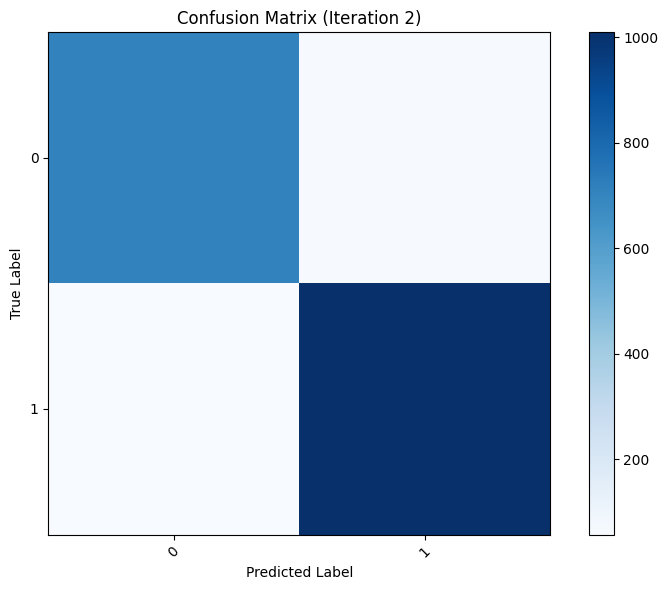

Iteration 3:
[[ 713   53]
 [  41 1025]]
              precision    recall  f1-score   support

           0       0.95      0.93      0.94       766
           1       0.95      0.96      0.96      1066

    accuracy                           0.95      1832
   macro avg       0.95      0.95      0.95      1832
weighted avg       0.95      0.95      0.95      1832

Accuracy: 0.9487



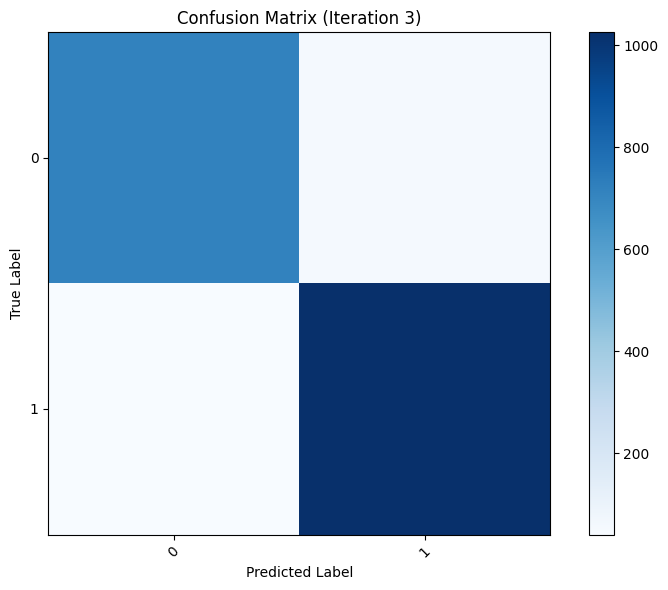

Iteration 4:
[[ 732   34]
 [  27 1039]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       766
           1       0.97      0.97      0.97      1066

    accuracy                           0.97      1832
   macro avg       0.97      0.97      0.97      1832
weighted avg       0.97      0.97      0.97      1832

Accuracy: 0.9667



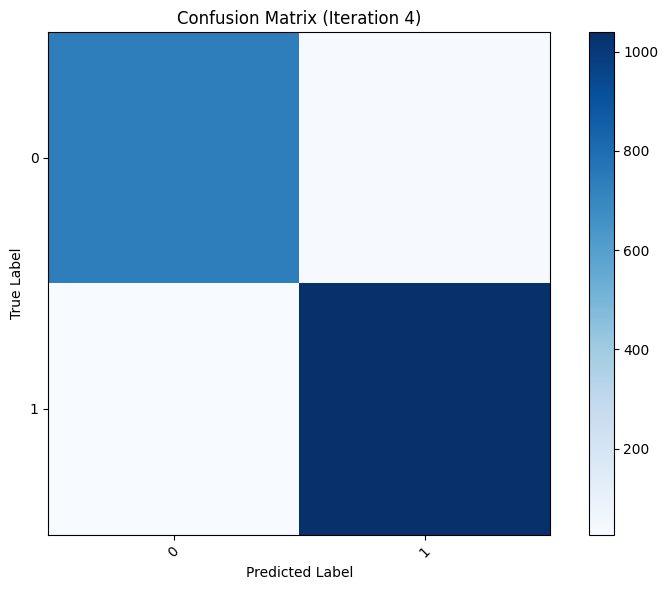

Iteration 5:
[[ 737   29]
 [  29 1037]]
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       766
           1       0.97      0.97      0.97      1066

    accuracy                           0.97      1832
   macro avg       0.97      0.97      0.97      1832
weighted avg       0.97      0.97      0.97      1832

Accuracy: 0.9683



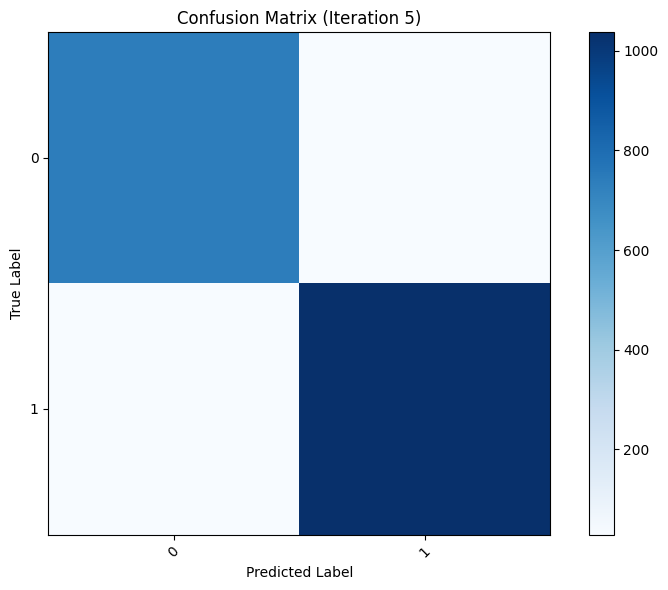

Model saved as 'random_forest_model.pkl'.


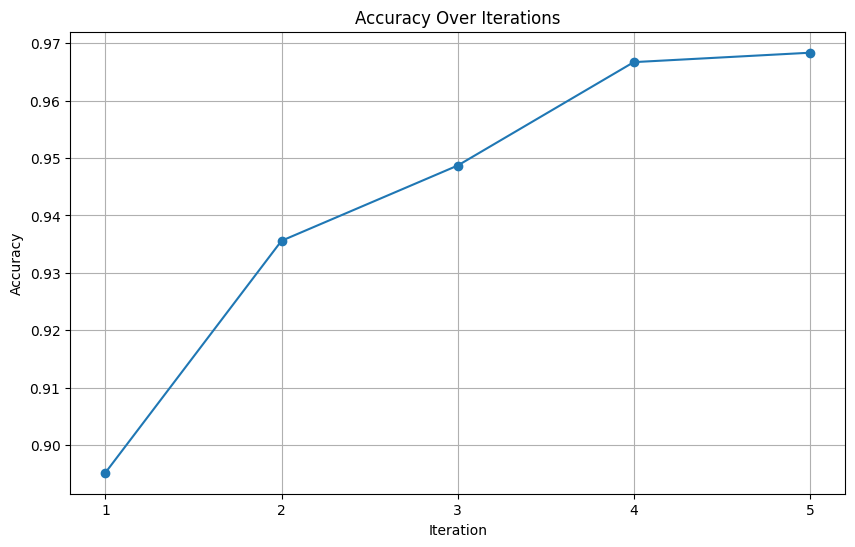

Training complete.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib

# Load the combined dataset
data = pd.read_csv('combined_parsed_requests.csv')

# Sample a smaller subset of the data
data = data.sample(frac=0.1, random_state=42)  # Use 10% of the dataset

# Define features and target
feature_columns = data.columns.drop('request_type')
X = data[feature_columns]
y = data['request_type']

# One-hot encode categorical features
X_encoded = pd.get_dummies(X, drop_first=True)

# Initial split of the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=42)

# Create a Random Forest classifier
model = RandomForestClassifier(random_state=42)

# Adjusted hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [200, 300],  # Increased number of estimators
    'max_depth': [None, 10, 15, 20],  # More options for max_depth
    'min_samples_split': [2, 5, 10],  # Include higher values
    'min_samples_leaf': [1, 2],  # Include higher values
    'max_features': ['sqrt', 'log2', 0.5, 0.6],  # Fraction of features
    'class_weight': ['balanced', None]  # Consider class weights
}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='precision_weighted', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_model = grid_search.best_estimator_

# Number of iterations to refine the model
n_iterations = 5
accuracy_history = []

for iteration in range(n_iterations):
    # Train the model
    best_model.fit(X_train, y_train)

    # Make predictions
    y_pred = best_model.predict(X_test)

    # Evaluate the model
    print(f"Iteration {iteration + 1}:")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))

    # Calculate and print accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_history.append(accuracy)
    print(f"Accuracy: {accuracy:.4f}\n")

    # Plotting the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap='Blues')
    plt.title(f'Confusion Matrix (Iteration {iteration + 1})')
    plt.colorbar()
    tick_marks = range(len(set(y)))
    plt.xticks(tick_marks, set(y), rotation=45)
    plt.yticks(tick_marks, set(y))
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.tight_layout()
    plt.savefig(f'confusion_matrix_iteration_{iteration + 1}.png')
    plt.show()

    # Identify misclassified samples
    misclassified_indices = [i for i in range(len(y_test)) if y_pred[i] != y_test.iloc[i]]

    # If there are no misclassified samples, break the loop
    if not misclassified_indices:
        print("No misclassified samples left. Stopping training.")
        break

    # Get the misclassified samples
    misclassified_X = X_test.iloc[misclassified_indices]
    misclassified_y = y_test.iloc[misclassified_indices]

    # Append misclassified samples to the training set
    X_train = pd.concat([X_train, misclassified_X])
    y_train = pd.concat([y_train, misclassified_y])

# Save the final model to a file
joblib.dump(best_model, 'random_forest_model.pkl')
print("Model saved as 'random_forest_model.pkl'.")

# Plot accuracy history
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(accuracy_history) + 1), accuracy_history, marker='o')
plt.title('Accuracy Over Iterations')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.xticks(range(1, len(accuracy_history) + 1))
plt.grid()
plt.savefig('accuracy_over_iterations.png')
plt.show()

print("Training complete.")


#### Gradient Boosting using XGBoost

First few rows of the dataset:
   GET  POST  PUT  DELETE  PATCH  \
0    1     0    0       0      0   
1    1     0    0       0      0   
2    1     0    0       0      0   
3    0     1    0       0      0   
4    1     0    0       0      0   

                                            Full URL  \
0  http://localhost:8080/tienda1/publico/autentic...   
1  http://localhost:8080/tienda1/publico/autentic...   
2  http://localhost:8080/tienda1/publico/vaciar.j...   
3   http://localhost:8080/tienda1/publico/anadir.jsp   
4  http://localhost:8080/tienda1/publico/caracter...   

                               URL Path  \
0       /tienda1/publico/autenticar.jsp   
1       /tienda1/publico/autenticar.jsp   
2           /tienda1/publico/vaciar.jsp   
3           /tienda1/publico/anadir.jsp   
4  /tienda1/publico/caracteristicas.jsp   

                                        Query Params  Query Params Length  \
0  modo=entrar; login=kavaler; pwd=timb44; rememb...                   59   
1 

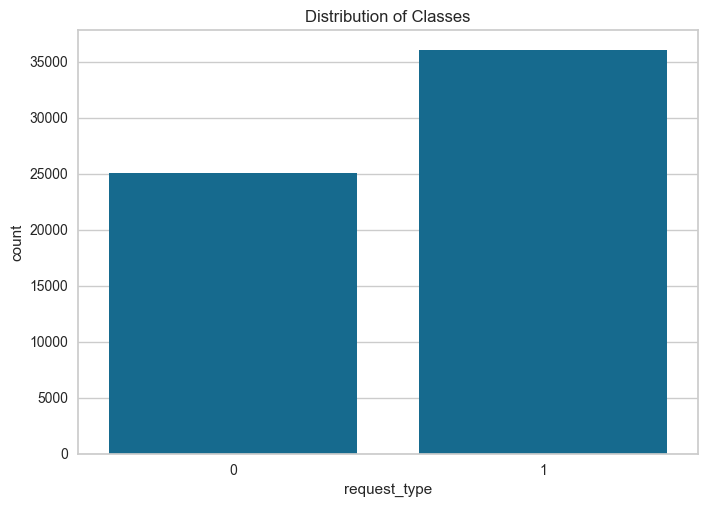

              precision    recall  f1-score   support

           0       0.79      0.93      0.86      5011
           1       0.95      0.83      0.88      7202

    accuracy                           0.87     12213
   macro avg       0.87      0.88      0.87     12213
weighted avg       0.88      0.87      0.87     12213

Accuracy: 0.87


In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
data = pd.read_csv('combined_parsed_requests.csv')

# Inspect the dataset
print("First few rows of the dataset:")
print(data.head())
print("\nDataset information:")
print(data.info())
print("\nStatistical summary:")
print(data.describe())
print("\nMissing values in each column:")
print(data.isnull().sum())

# Visualize the distribution of the target variable
sns.countplot(x='request_type', data=data)
plt.title('Distribution of Classes')
plt.show()

# Define features and target
X = data.drop(columns=['request_type'])  # Drop the target column
y = data['request_type']  # Target column

# Encode the target variable
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

# One-hot encode categorical features
X = pd.get_dummies(X, drop_first=True)

# Rename columns to avoid special characters
X.columns = X.columns.str.replace('[\[\]<>]', '', regex=True)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    eval_metric='mlogloss'
)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred))

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')


In [25]:
import pandas as pd
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, accuracy_score

# Load your dataset
# Assuming X is your features DataFrame and y is your target Series
# X, y = pd.read_csv('your_dataset.csv'), pd.read_csv('your_labels.csv')

# Check for missing values
print("Missing values before imputation:")
print(X.isnull().sum())

# Handle missing values using SimpleImputer
# Impute with mean for numerical features
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Check for missing values after imputation
print("Missing values after imputation:")
print(pd.DataFrame(X_imputed).isnull().sum())

# Resample the dataset using SMOTE
smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X_imputed, y)

# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xgb_model = XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=6, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Missing values before imputation:
GET                                                                                                                                                                                                                                                                                       0
POST                                                                                                                                                                                                                                                                                      0
PUT                                                                                                                                                                                                                                                                                       0
DELETE                                                                                                            